## Import the dependecies

In [1]:
# Sierra Leone Solar Data Analysis
# EDA for Sierra Leone solar dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##Loading the file

In [2]:
## Data Loading
print("=== LOADING Togo-dapaong DATA ===")

df = pd.read_csv('../data/togo-dapaong_qc.csv')
print(f"Data shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

=== LOADING Togo-dapaong DATA ===
Data shape: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First 5 rows:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4

## Summary Statistics & Missing Values

In [3]:
print("An overview of the dataset: ")
print(df.info())

An overview of the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  

In [4]:
# Summary Statistics for all numeric columns
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000

In [5]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2022-10-24 23:21
freq                   1


In [6]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-10-24 23:21            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     230.555040     151.258469     116.444352   
std                  NaN     322.532347     250.956962     156.520714   
min                  NaN     -12.700000       0.000000       0.000000   
25%                  NaN      -2.200000       0.000000       0.000000   
50%                  NaN       2.100000       0.000000       2.500000   
75%                  NaN     442.400000     246.400000     215.700000   
max                  NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [9]:
# Missing Values Analysis using also a percent to use it for later on Z-score
print("\n MISSING VALUES REPORT ")
missing_data = df.isna().sum()
missing_percent = (df.isna().sum() / len(df)) * 100

missing_report = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})

print(missing_report)


 MISSING VALUES REPORT 
               Missing_Count  Missing_Percent
Timestamp                  0              0.0
GHI                        0              0.0
DNI                        0              0.0
DHI                        0              0.0
ModA                       0              0.0
ModB                       0              0.0
Tamb                       0              0.0
RH                         0              0.0
WS                         0              0.0
WSgust                     0              0.0
WSstdev                    0              0.0
WD                         0              0.0
WDstdev                    0              0.0
BP                         0              0.0
Cleaning                   0              0.0
Precipitation              0              0.0
TModA                      0              0.0
TModB                      0              0.0
Comments              525600            100.0


In [7]:
# Exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)


Duplicate rows: 0
Cardinality (categoricals): {'Timestamp': 525600}


In [10]:
# Columns with more than 5% missing values
print("COLUMNS WITH >5% MISSING VALUES")
high_missing = missing_report[missing_report['Missing_Percent'] > 5]

if not high_missing.empty:
    print("Missing values:")
    print(high_missing)
else:
    print("No columns have more than 5% missing values")

COLUMNS WITH >5% MISSING VALUES
Missing values:
          Missing_Count  Missing_Percent
Comments         525600            100.0


# Outlier detection and Basic Cleaning

In [11]:
# Define key columns for outlier detection
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print("=== ANALYZING KEY COLUMNS FOR OUTLIERS ===")
print("Key columns:", key_columns)

# Check which of these columns exist in our data
available_columns = [col for col in key_columns if col in df.columns]
print("Available columns in dataset:", available_columns)

=== ANALYZING KEY COLUMNS FOR OUTLIERS ===
Key columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
Available columns in dataset: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [12]:
# Compute Z-scores and flag outliers (|Z| > 3)
print("\nOUTLIER DETECTION USING Z-SCORES")

# Create a copy of the dataframe for cleaning
df_clean = df.copy()
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
available_columns = [col for col in key_columns if col in df.columns]
for column in available_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df_clean[column].dropna()))
    
    # Find outliers
    outliers = z_scores > 3
    outlier_count = outliers.sum()
    outlier_percent = (outlier_count / len(df_clean[column].dropna())) * 100
    
    print(f"{column}: {outlier_count} outliers ({outlier_percent:.2f}%)")
    
    # Flag outliers in the dataframe
    df_clean[f'{column}_outlier'] = False
    df_clean.loc[df_clean[column].notna(), f'{column}_outlier'] = outliers

# Total rows with any outlier
any_outlier = df_clean[[f'{col}_outlier' for col in available_columns]].any(axis=1)
print(f"\nTotal rows with at least one outlier: {any_outlier.sum()} ({any_outlier.mean()*100:.2f}%)")


OUTLIER DETECTION USING Z-SCORES
GHI: 305 outliers (0.06%)
DNI: 1062 outliers (0.20%)
DHI: 3415 outliers (0.65%)
ModA: 137 outliers (0.03%)
ModB: 206 outliers (0.04%)
WS: 3510 outliers (0.67%)
WSgust: 3915 outliers (0.74%)

Total rows with at least one outlier: 9251 (1.76%)


In [13]:
# Drop or impute missing values in key columns
print("\n MISSING VALUE IMPUTE")

for column in available_columns:
    missing_before = df_clean[column].isna().sum()
    
    if missing_before > 0:
        # Impute with median (you can change to mean if preferred)
        median_value = df_clean[column].median()
        df_clean[column].fillna(median_value, inplace=True)
        
        missing_after = df_clean[column].isna().sum()
        print(f"{column}: Imputed {missing_before} missing values with median {median_value:.2f}")

print("\nMissing values after treatment:")
print(df_clean[available_columns].isna().sum())


 MISSING VALUE IMPUTE

Missing values after treatment:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [14]:
## Export Cleaned Data
print("=== EXPORTING CLEANED DATA ===")

df_clean.to_csv('../data/togo_clean.csv', index=False)
print("Cleaned data saved to: ../data/togo_clean.csv")

=== EXPORTING CLEANED DATA ===
Cleaned data saved to: ../data/togo_clean.csv


# Time series analysis

=== TIME SERIES ANALYSIS ===


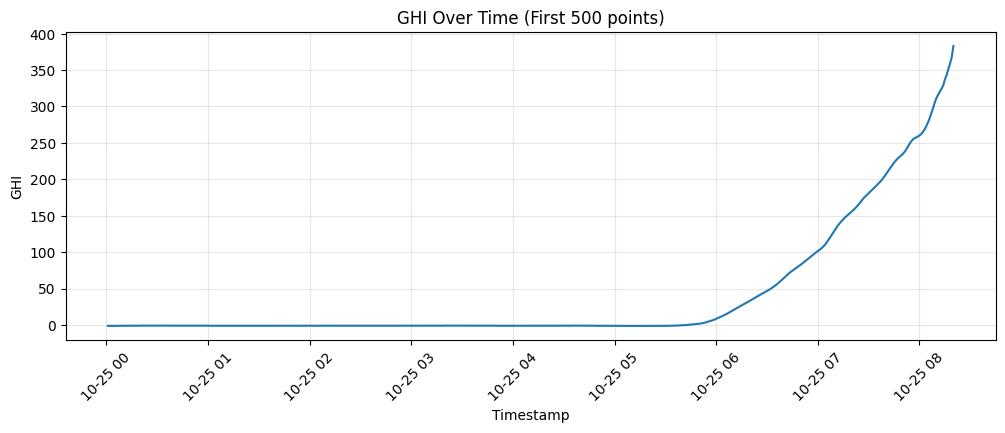

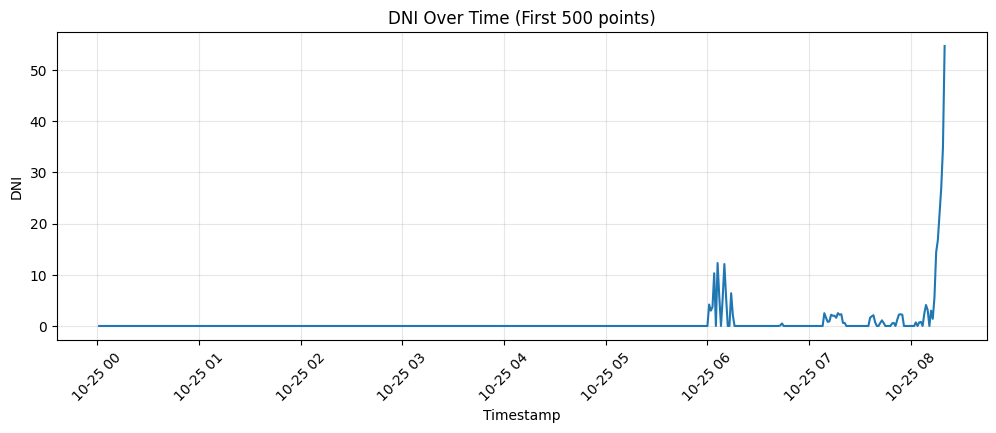

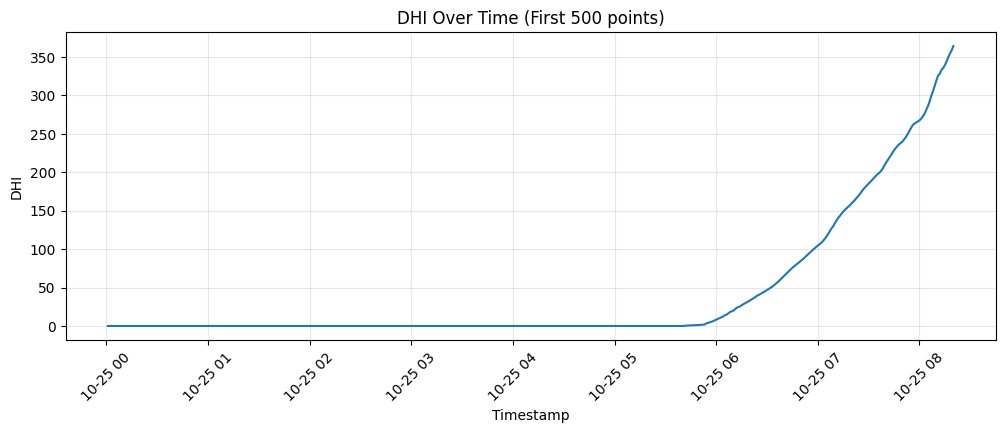

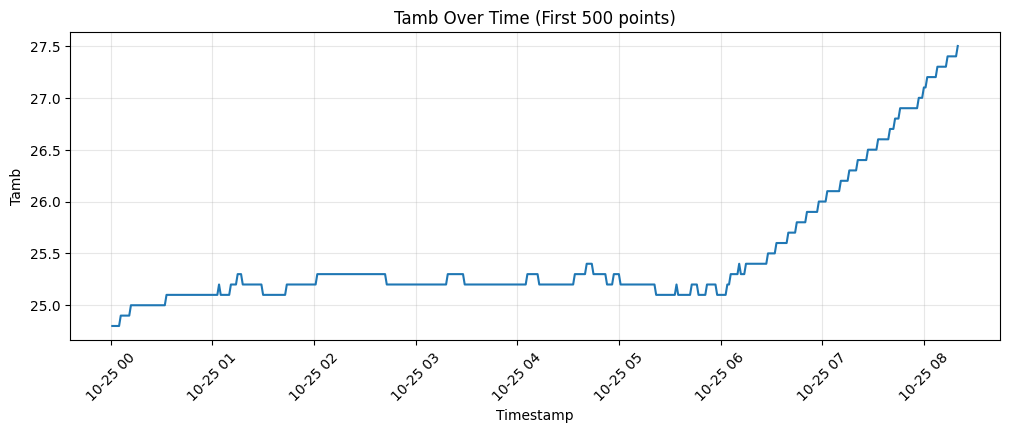

In [15]:
## Time Series Analysis
print("=== TIME SERIES ANALYSIS ===")

# Convert timestamp
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Month'] = df_clean['Timestamp'].dt.month

# Plot time series for key variables
variables_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

for var in variables_to_plot:
    if var in df_clean.columns:
        plt.figure(figsize=(12, 4))
        # Plot first 500 points for clarity
        plt.plot(df_clean['Timestamp'].iloc[:500], df_clean[var].iloc[:500])
        plt.title(f'{var} Over Time (First 500 points)')
        plt.xlabel('Timestamp')
        plt.ylabel(var)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.show()

=== DAILY PATTERNS ===


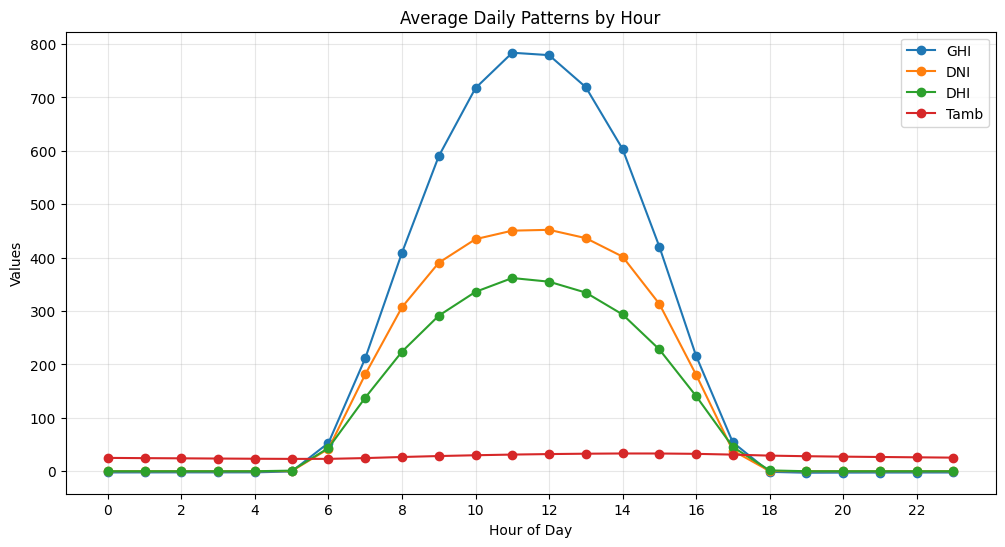

In [16]:
## Daily Patterns
print("=== DAILY PATTERNS ===")

# Calculate hourly averages
hourly_avg = df_clean.groupby('Hour')[variables_to_plot].mean()

plt.figure(figsize=(12, 6))
for var in variables_to_plot:
    if var in hourly_avg.columns:
        plt.plot(hourly_avg.index, hourly_avg[var], marker='o', label=var)

plt.title('Average Daily Patterns by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.show()

=== MONTHLY PATTERNS ===


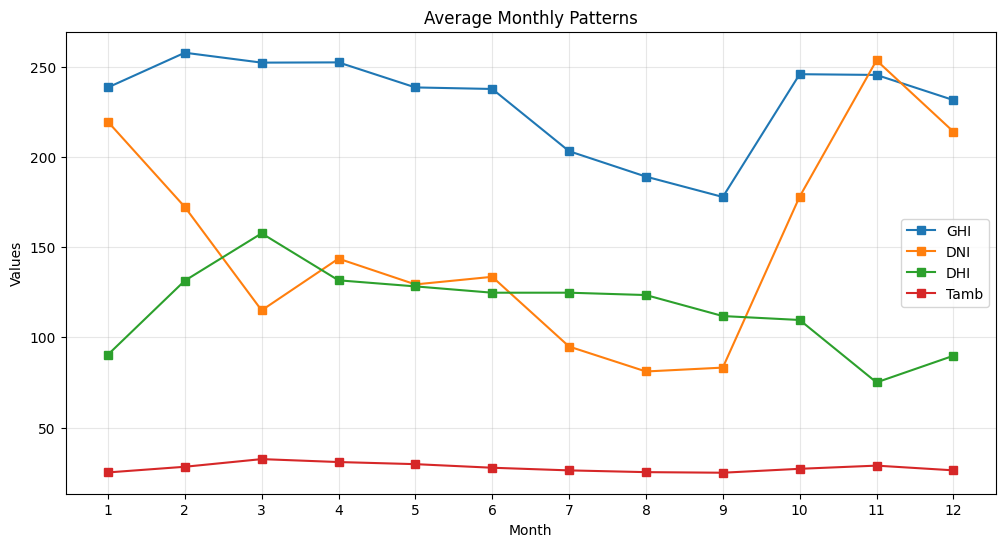

In [17]:
## Monthly Patterns
print("=== MONTHLY PATTERNS ===")

monthly_avg = df_clean.groupby('Month')[variables_to_plot].mean()

plt.figure(figsize=(12, 6))
for var in variables_to_plot:
    if var in monthly_avg.columns:
        plt.plot(monthly_avg.index, monthly_avg[var], marker='s', label=var)

plt.title('Average Monthly Patterns')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.show()

In [18]:
# Detect potential anomalies
print("=== ANOMALY DETECTION ===")

# Find days with unusual patterns (e.g., very low GHI during daytime)
daytime_hours = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
daytime_data = df_clean[df_clean['Hour'].isin(daytime_hours)]

# Flag days with very low solar radiation during daytime
low_ghi_days = daytime_data[daytime_data['GHI'] < 10]  # Adjust threshold as needed

if not low_ghi_days.empty:
    print(f"Found {len(low_ghi_days)} records with very low GHI during daytime")
    print("These could be cloudy days, rainy days, or data issues")
    
    # Show the dates with lowest GHI
    low_ghi_summary = low_ghi_days.groupby(low_ghi_days['Timestamp'].dt.date).size()
    print("\nDates with most low-GHI records:")
    print(low_ghi_summary.sort_values(ascending=False).head(10))
else:
    print("No significant anomalies detected in daytime GHI values")

=== ANOMALY DETECTION ===
Found 30595 records with very low GHI during daytime
These could be cloudy days, rainy days, or data issues

Dates with most low-GHI records:
Timestamp
2022-09-18    245
2022-10-06    195
2022-10-13    186
2022-08-04    181
2022-07-26    172
2022-08-14    170
2022-05-09    167
2022-08-15    147
2022-07-31    147
2022-09-27    145
dtype: int64


# Cleaning impact analysis

=== CLEANING IMPACT ===
Average sensor readings by outlier status:
                   ModA        ModB
had_outlier                        
False        219.380751  213.028150
True         603.659248  584.626257


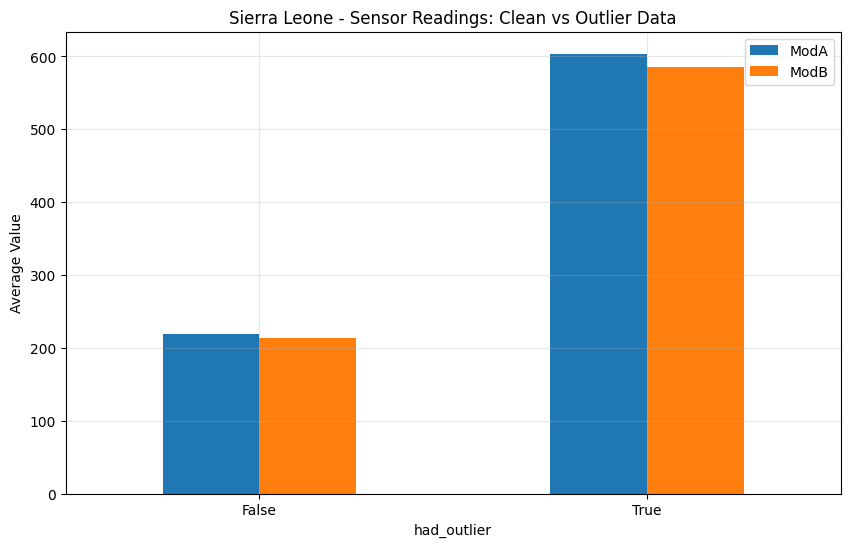

In [19]:
## Cleaning Impact Analysis
print("=== CLEANING IMPACT ===")

# Create cleaning flag
df_clean['had_outlier'] = False
outlier_cols = [f'{col}_outlier' for col in available_columns if f'{col}_outlier' in df_clean.columns]
if outlier_cols:
    df_clean['had_outlier'] = df_clean[outlier_cols].any(axis=1)

# Compare sensor readings
sensor_cols = ['ModA', 'ModB']
available_sensors = [col for col in sensor_cols if col in df_clean.columns]

if available_sensors and 'had_outlier' in df_clean.columns:
    sensor_comparison = df_clean.groupby('had_outlier')[available_sensors].mean()
    print("Average sensor readings by outlier status:")
    print(sensor_comparison)
    
    # Plot comparison
    sensor_comparison.plot(kind='bar', figsize=(10, 6))
    plt.title('Sierra Leone - Sensor Readings: Clean vs Outlier Data')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3)
    plt.show()

# Correlation & Relationship analysis

In [20]:
## Correlation Analysis
print("=== CORRELATION ANALYSIS ===")

# Check if df_clean exists
if 'df_clean' not in locals():
    print("ERROR: Run previous cells first to create df_clean!")
else:
    # Define variables for correlation analysis included Tamb,RH,WS,WSgust and WD as they are used in scatter plots
    correlation_vars = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD']

    # Check which variables exist in our dataset
    available_corr_vars = [var for var in correlation_vars if var in df_clean.columns]
    print(f"Variables available for correlation: {available_corr_vars}")

    # Select only numeric columns for correlation
    corr_data = df_clean[available_corr_vars].select_dtypes(include=[np.number])

    print(f"Data shape for correlation: {corr_data.shape}")

=== CORRELATION ANALYSIS ===
Variables available for correlation: ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD']
Data shape for correlation: (525600, 10)



CORRELATION HEATMAP 


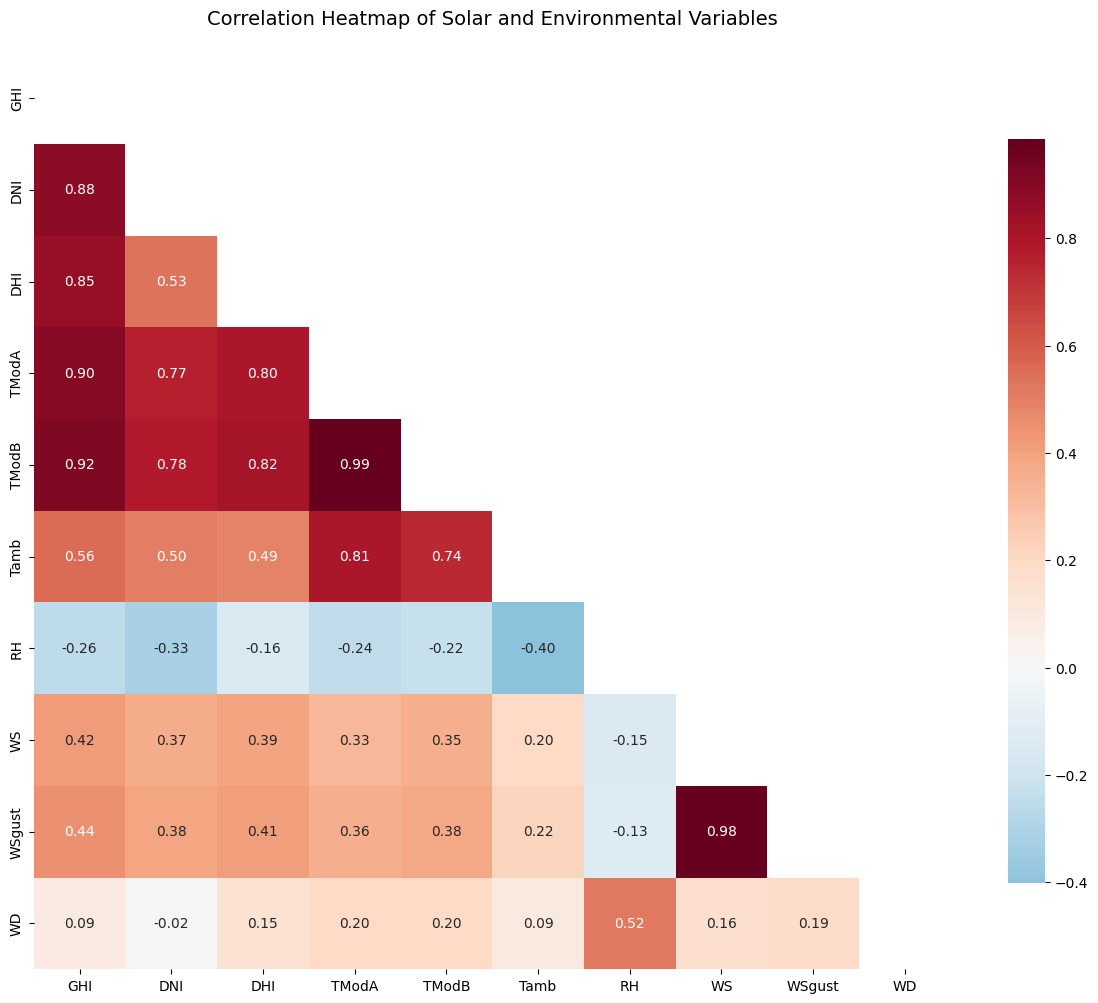

In [21]:
# Create correlation heatmap
print("\nCORRELATION HEATMAP ")

plt.figure(figsize=(12, 10))

# Calculate correlation matrix
correlation_matrix = corr_data.corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of Solar and Environmental Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

=== SCATTER PLOT RELATIONSHIPS ===


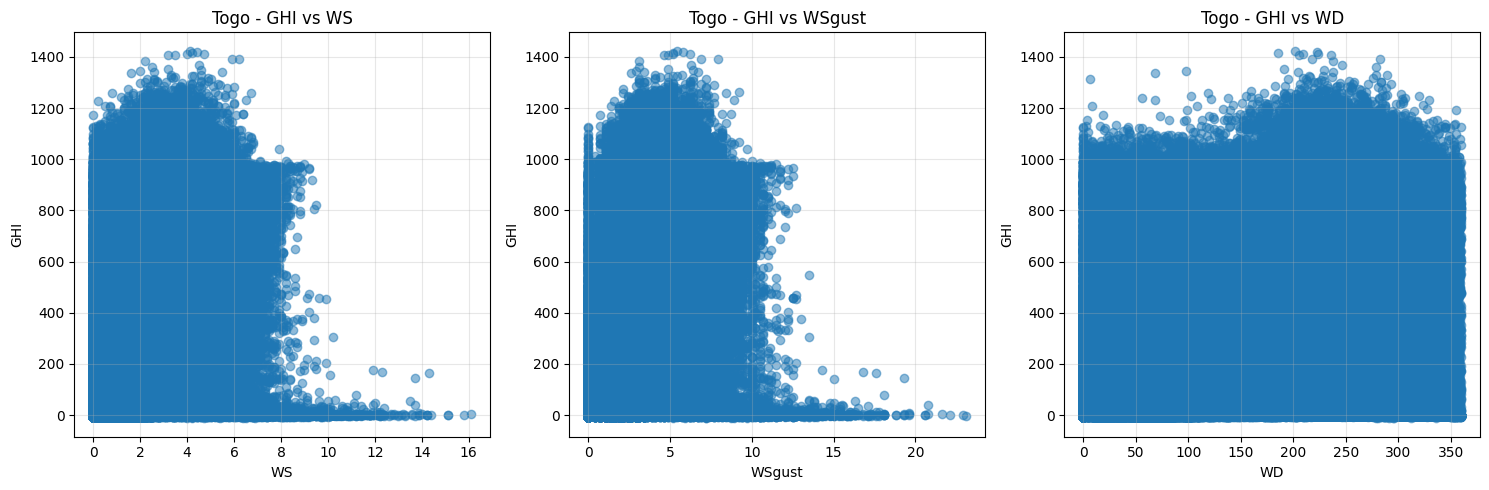

In [22]:
## Scatter Plot Relationships
print("=== SCATTER PLOT RELATIONSHIPS ===")

# Wind vs GHI
wind_vars = ['WS', 'WSgust', 'WD']
available_wind = [var for var in wind_vars if var in df_clean.columns]

if available_wind and 'GHI' in df_clean.columns:
    fig, axes = plt.subplots(1, len(available_wind), figsize=(15, 5))
    if len(available_wind) == 1:
        axes = [axes]
    
    for i, wind_var in enumerate(available_wind):
        axes[i].scatter(df_clean[wind_var], df_clean['GHI'], alpha=0.5)
        axes[i].set_xlabel(wind_var)
        axes[i].set_ylabel('GHI')
        axes[i].set_title(f'Togo - GHI vs {wind_var}')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for wind analysis not available")

=== HUMIDITY RELATIONSHIPS ===


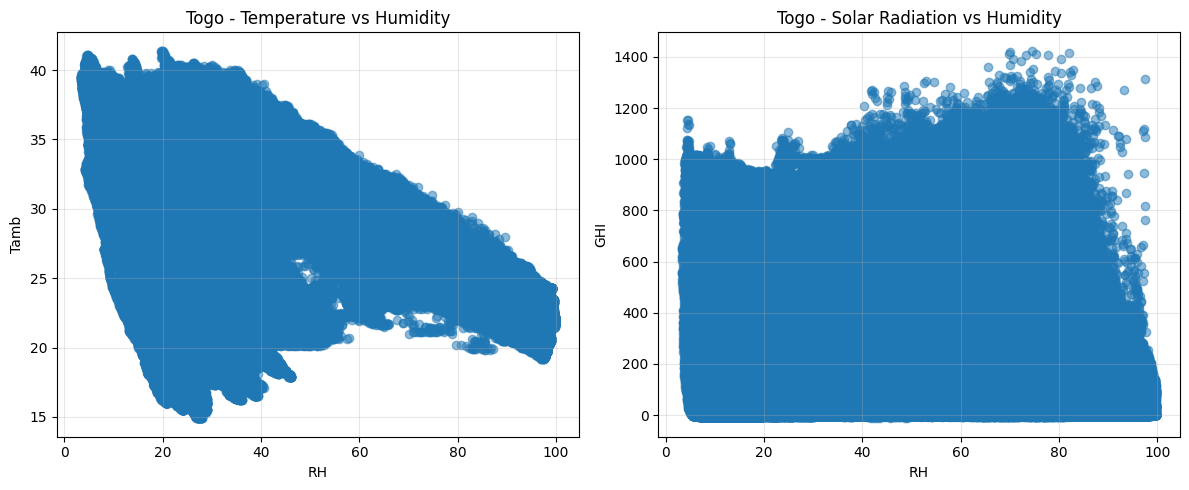

In [23]:
## RH Relationships
print("=== HUMIDITY RELATIONSHIPS ===")

if 'RH' in df_clean.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # RH vs Tamb
    if 'Tamb' in df_clean.columns:
        ax1.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5)
        ax1.set_xlabel('RH')
        ax1.set_ylabel('Tamb')
        ax1.set_title('Togo - Temperature vs Humidity')
        ax1.grid(True, alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'Tamb column not available', ha='center', va='center')
        ax1.set_title('Temperature vs Humidity (Data Missing)')
    
    # RH vs GHI
    if 'GHI' in df_clean.columns:
        ax2.scatter(df_clean['RH'], df_clean['GHI'], alpha=0.5)
        ax2.set_xlabel('RH')
        ax2.set_ylabel('GHI')
        ax2.set_title('Togo - Solar Radiation vs Humidity')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'GHI column not available', ha='center', va='center')
        ax2.set_title('Solar Radiation vs Humidity (Data Missing)')
    
    plt.tight_layout()
    plt.show()
else:
    print("RH column not available for humidity analysis")

## Wind and Distribution Analysis

=== WIND DISTRIBUTION ===


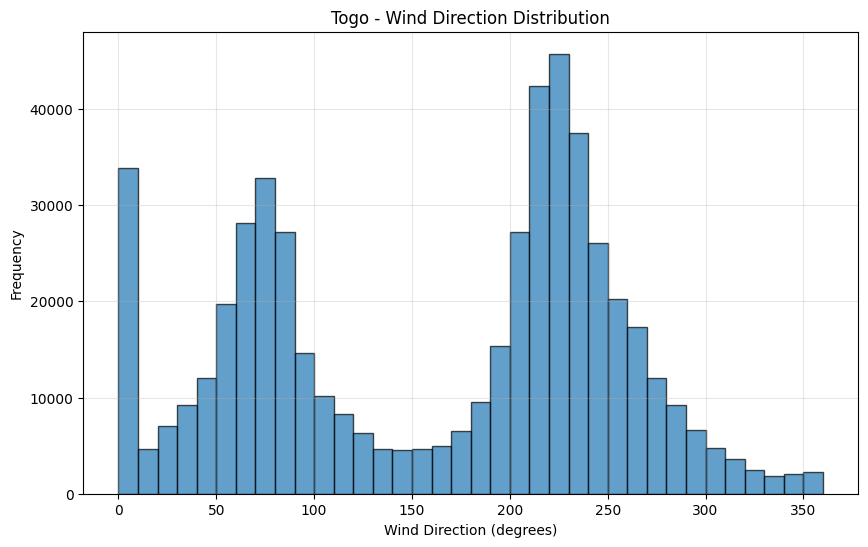

In [24]:
## Wind Distribution Analysis
print("=== WIND DISTRIBUTION ===")

if 'WS' in df_clean.columns and 'WD' in df_clean.columns:
    # Simple wind direction histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['WD'].dropna(), bins=36, alpha=0.7, edgecolor='black')
    plt.xlabel('Wind Direction (degrees)')
    plt.ylabel('Frequency')
    plt.title('Togo - Wind Direction Distribution')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Wind data (WS or WD) not available for distribution analysis")

=== VARIABLE DISTRIBUTIONS ===


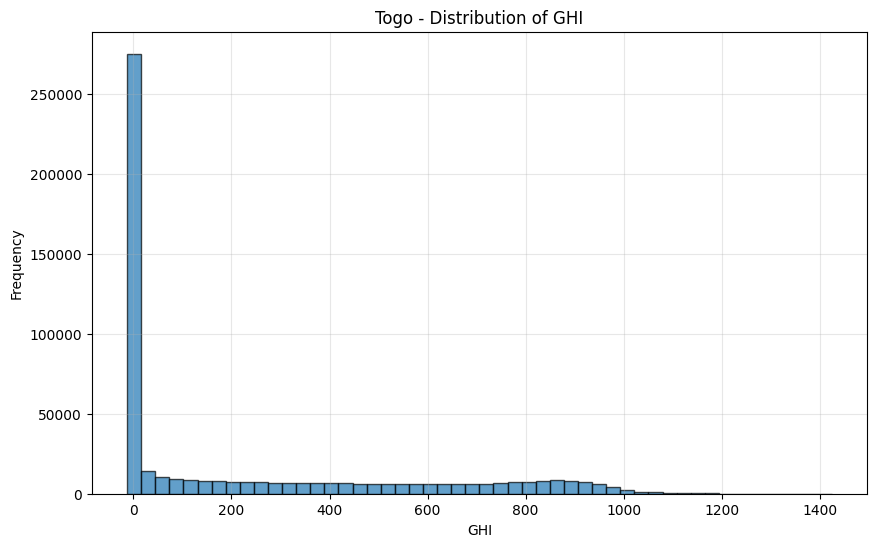

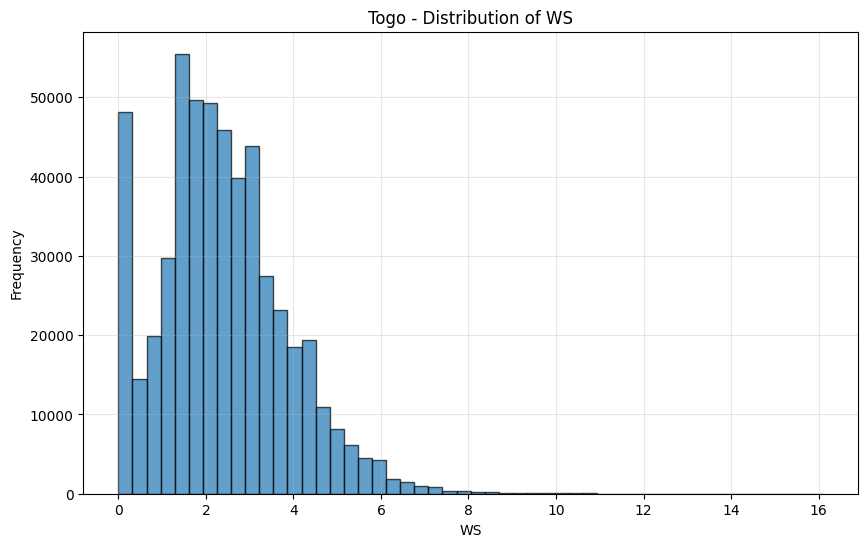

In [25]:
## Variable Distributions
print("=== VARIABLE DISTRIBUTIONS ===")

# Histograms for GHI and WS
dist_vars = ['GHI', 'WS']
available_dist = [var for var in dist_vars if var in df_clean.columns]

if available_dist:
    for var in available_dist:
        plt.figure(figsize=(10, 6))
        plt.hist(df_clean[var].dropna(), bins=50, alpha=0.7, edgecolor='black')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.title(f'Togo - Distribution of {var}')
        plt.grid(True, alpha=0.3)
        plt.show()
else:
    print("No distribution variables available")

## Temperature Analysis

=== TEMPERATURE-HUMIDITY ANALYSIS ===


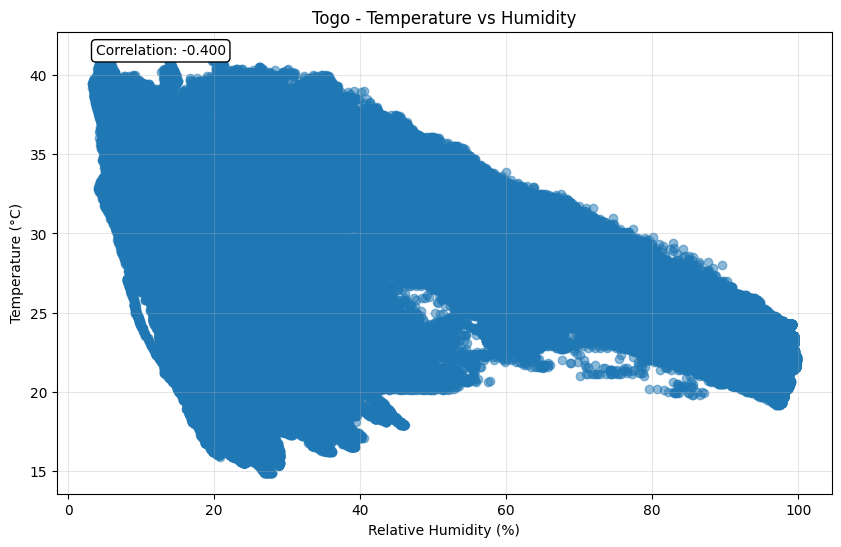

Average GHI - Low RH (<50%): 287.95
Average GHI - High RH (>80%): 65.58


In [26]:
## Temperature-Humidity Analysis
print("=== TEMPERATURE-HUMIDITY ANALYSIS ===")

if 'Tamb' in df_clean.columns and 'RH' in df_clean.columns:
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5)
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (°C)')
    plt.title('Togo - Temperature vs Humidity')
    plt.grid(True, alpha=0.3)
    
    # Add correlation
    corr = df_clean['RH'].corr(df_clean['Tamb'])
    plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle="round", facecolor="white"))
    plt.show()
    
    # Compare GHI in different humidity conditions
    if 'GHI' in df_clean.columns:
        low_rh = df_clean[df_clean['RH'] < 50]['GHI'].mean()
        high_rh = df_clean[df_clean['RH'] > 80]['GHI'].mean()
        print(f"Average GHI - Low RH (<50%): {low_rh:.2f}")
        print(f"Average GHI - High RH (>80%): {high_rh:.2f}")
else:
    print("Required columns (Tamb and RH) not available for temperature-humidity analysis")

## Bubble chart Analysis

=== BUBBLE CHART ===


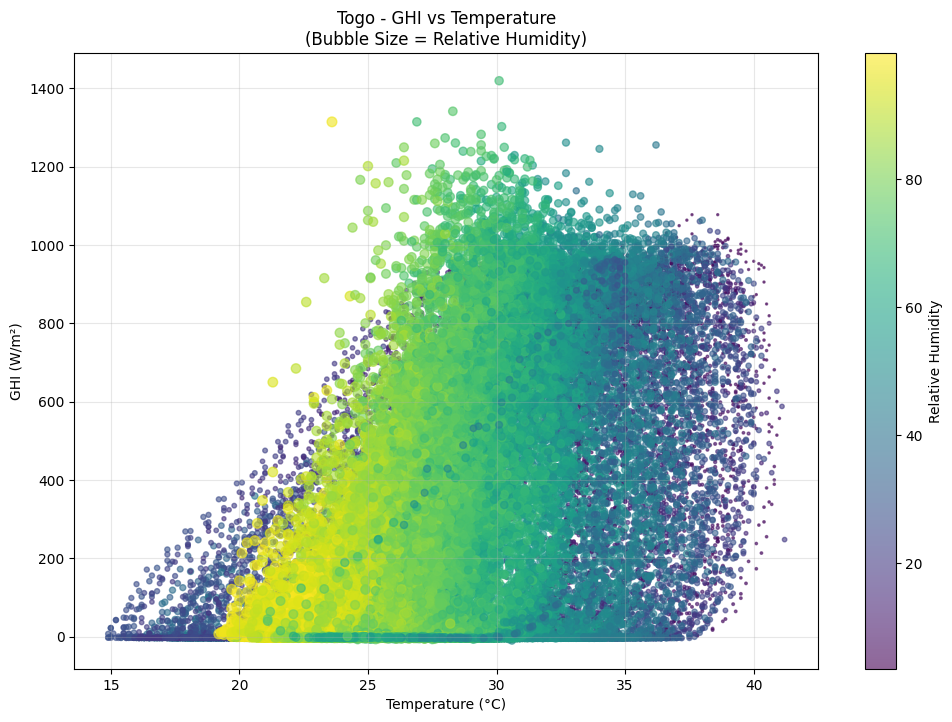

In [27]:
## Bubble Chart
print("=== BUBBLE CHART ===")

if 'GHI' in df_clean.columns and 'Tamb' in df_clean.columns:
    # Use RH for bubble size if available, otherwise BP
    if 'RH' in df_clean.columns:
        bubble_var = 'RH'
        bubble_label = 'Relative Humidity'
    elif 'BP' in df_clean.columns:
        bubble_var = 'BP'
        bubble_label = 'Barometric Pressure'
    else:
        bubble_var = None
    
    if bubble_var:
        # Sample data for better visualization
        sample_data = df_clean.iloc[::10]  # Every 10th point
        
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(sample_data['Tamb'], sample_data['GHI'],
                             s=sample_data[bubble_var]/2,  # Scale bubble size
                             alpha=0.6, 
                             c=sample_data[bubble_var],
                             cmap='viridis')
        
        plt.xlabel('Temperature (°C)')
        plt.ylabel('GHI (W/m²)')
        plt.title(f'Togo - GHI vs Temperature\n(Bubble Size = {bubble_label})')
        plt.colorbar(scatter, label=bubble_label)
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("No suitable bubble size variable (RH or BP) available")
else:
    print("Required columns (GHI and Tamb) not available for bubble chart")

## Final Summary

In [28]:
## Final Export and Summary
print("=== EXPORTING ANALYSIS METRICS ===")

# Create summary statistics for reporting
analysis_metrics = {
    'total_records': len(df_clean),
    'analysis_period_days': (df_clean['Timestamp'].max() - df_clean['Timestamp'].min()).days,
    'data_quality_score': (len(df_clean) - df_clean.isna().sum().sum()) / len(df_clean) * 100,
    'avg_ghi': df_clean['GHI'].mean() if 'GHI' in df_clean.columns else None,
    'avg_temperature': df_clean['Tamb'].mean() if 'Tamb' in df_clean.columns else None,
    'avg_humidity': df_clean['RH'].mean() if 'RH' in df_clean.columns else None,
}

print("Togo Analysis Metrics for Reporting:")
for metric, value in analysis_metrics.items():
    if value is not None:
        if isinstance(value, float):
            print(f"  {metric.replace('_', ' ').title()}: {value:.2f}")
        else:
            print(f"  {metric.replace('_', ' ').title()}: {value}")

print("\n✅ Togo Exploratory Data Analysis COMPLETE!")
print("   All three country analyses finished! Ready for comparative reporting!")

=== EXPORTING ANALYSIS METRICS ===
Togo Analysis Metrics for Reporting:
  Total Records: 525600
  Analysis Period Days: 364
  Data Quality Score: 0.00
  Avg Ghi: 230.56
  Avg Temperature: 27.75
  Avg Humidity: 55.01

✅ Togo Exploratory Data Analysis COMPLETE!
   All three country analyses finished! Ready for comparative reporting!
